# Text Exploration
![](https://media.giphy.com/media/3o6ozjrPeWQifzyA6Y/giphy.gif)

This morning we will be doing some EDA with the nltk library.

In [1]:
# Base Libraries
import pandas as pd
import numpy as np
import string

# NLP
import nltk
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.collocations import (BigramCollocationFinder, BigramAssocMeasures, 
                               TrigramCollocationFinder, TrigramAssocMeasures)
nltk.download('punkt')

# Visualization
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielmorr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In the cell below, we import the policy proposal by 2020 Democratic Presidential Candidates Bernie Sanders and Elizabeth Warren.

In [2]:
df = pd.read_csv('data/2020_policies_feb_24.csv')
df.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",warren
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,warren
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",warren
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,warren
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,warren


**We need to do some processing to make this text usable.** 

In the cell below, define a function called `prepocessing` that receives a single parameter called `text`.

<u><b>This function should:</b></u>
1. Lower the text so all letters are the same case
2. Use nltk's `word_tokenize` function to convert the string into a list of tokens.
3. Remove stop words from the data using nltk's english stopwords corpus.
4. Use nltk's `PortStemmer` to stem the text data
5. Remove punctuation from the data 
    - *(You can use the [string](https://www.journaldev.com/23788/python-string-module) library for this)*
6. Convert the list of tokens into a string
7. Remove opening and trailing spaces, and replace all double spaces with a single space.
8. Return the results.

In [27]:
stemmer = PorterStemmer()
stops = stopwords.words('english')

def preprocessing(text):
    data = text.lower()
    data = word_tokenize(data)
    data = [word for word in data if word not in stops]
    data = [stemmer.stem(token) for token in data]
    data = ' '.join(data)
    data = data.replace('  ', ' ')
    punctuation = string.punctuation + '—' + '’' + ' : '
    return data.strip()


  

**For this warmup, tests are not provided.** 

Instead, examine the output for the following cell. 
- Was your code successful? 
- Are there words in the output that should be added to our list of stopwords?
- Should we remove numbers?

In [28]:
preprocessing(df.policy[0])

"publish medium septemb 3rd , 2019 : scienc clear . world ’ lead expert long known climat chang cau human , , accel . alreadi see effect — record flood , devast wildfir , 100-year storm happen everi year — cost live , cau hundr billion dollar damag , disproport impact vulner commun , includ commun color , children , low-incom commun . emerg , without rapid widespread chang , soon unabl prevent worst harm . climat crisi leav one untouch . also repr once-in-a-gen opportun : creat million good american job clean renew energi , infrastructur , manufactur ; unleash best american innov creativ ; rebuild union creat real progress justic worker ; directli confront racial econom inequ emb fossil fuel economi . world must limit warm 1.5° c avoid catastroph outcom , cut carbon pollut roughli half 2030 achiev net-zero emiss 2050. world ’ largest histor carbon pollut , unit state special respon lead way . ’ ’ origin support green new deal , challeng us go beyond — launch ten-year mobil 2030 achiev 

**Let's apply our preprocessing to every policy.**

In [5]:
df.policy = df.policy.apply(preprocessing)

print(df.policy[:3])

0    publish medium septemb 3rd , 2019 : scienc cle...
1    small busi heart economi . even though america...
2    publish medium juli 11th , 2019 : immigr alway...
Name: policy, dtype: object


Now, we can explore our text data.

In the cell below define a function called `average_word_length` that receives a single parameter called `text`, and outputs the average word length.

<u><b>This function should:</b></u>
1. Split the text into a list of tokens
2. Find the length of every word in the list
3. Sum the word lengths and divide by the number of words in the list of tokens.
4. Return the result.

In [6]:
# Your code here
def average_word_length(text):
    pass

Now, we apply our function to every policy and add the output as column.

In [7]:
df['average_word_length'] = df.policy.apply(average_word_length)

Sweet let's take a look at the documents with the highest average word length.

In [8]:
df.sort_values(by='average_word_length', ascending=False).head()

,Unnamed: 0,name,policy,candidate,average_word_length
0,0,100% Clean Energy for America,"publish medium septemb 3rd , 2019 : scienc cle...",warren,None
1,1,A Comprehensive Agenda to Boost America’s Smal...,small busi heart economi . even though america...,warren,None
2,2,A Fair and Welcoming Immigration System,"publish medium juli 11th , 2019 : immigr alway...",warren,None
3,3,A Fair Workweek for America’s Part-Time Workers,work famili across countri get crush . corpor ...,warren,None
4,4,A Great Public School Education for Every Student,attend public school grow oklahoma . graduat u...,warren,None


An average measurement can be a bit misleading. 

Let's also write a function that finds the word count for a given document.

In the cell below, define a function called `word_count` that receives a single `text` parameter.

<u><b>This function should:</b></u>
1. Split the text data
2. Return the length of the array.

In [9]:
# Your code here
def word_count(text):
    pass

Nice. Now we apply the function to our entire dataset, and save the output as a column

In [10]:
df['word_count'] = df.policy.apply(word_count)

df.sort_values(by='average_word_length', ascending=False).head()

,Unnamed: 0,name,policy,candidate,average_word_length,word_count
0,0,100% Clean Energy for America,"publish medium septemb 3rd , 2019 : scienc cle...",warren,None,None
1,1,A Comprehensive Agenda to Boost America’s Smal...,small busi heart economi . even though america...,warren,None,None
2,2,A Fair and Welcoming Immigration System,"publish medium juli 11th , 2019 : immigr alway...",warren,None,None
3,3,A Fair Workweek for America’s Part-Time Workers,work famili across countri get crush . corpor ...,warren,None,None
4,4,A Great Public School Education for Every Student,attend public school grow oklahoma . graduat u...,warren,None,None


Interesting. Let's take a look at the distribution for the `word_count` column.

TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

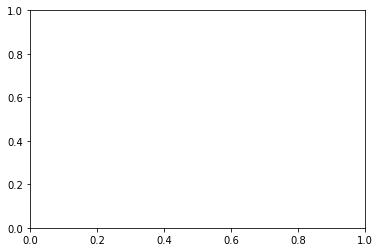

In [11]:
warren_df = df[df.candidate=='warren']
sanders_df = df[df.candidate=='sanders']

plt.hist(warren_df.word_count, alpha=.6, label='Warren')
plt.hist(sanders_df.word_count, alpha=.6, label='Sanders')
plt.legend()
plt.show()

It looks like the average length of a policy is about 1,000 words.

Let's print the mean and median for the `word_count` column.

In [ ]:
print('Mean Word Count: ',df.word_count.mean())
print('Median Word Count: ',df.word_count.median())

*There are some outliers in this data in a full data science project would need to be explored.*

**Ok, final thing!**

Let's find out what the most frequent words are for each candidate.

First, we use list comprehension to create a list of token-lists.

In [ ]:
token_warren= [word_tokenize(policy) for policy in warren_df.policy] 

Next, we want to create a bag of words. AKA a single list containing every token.

In [ ]:
warren_bow = []
for doc in token_warren:
    warren_bow.extend([word.lower() for word in doc])

Now, we use the `FreqDist` object to find the 10 most frequent words.

In [ ]:
fd_warren = FreqDist(warren_bow)
print(fd_warren.most_common(10))

Are there any words here that should be added to our list of stopwords?

*In the cell below* define a function called `word_frequency` that receives a series of documents, and outputs a fitted FreqDist object.

<u><b>This function should be</b></u> a generalized version of the code we just wrote, only instead of printing out the most frequent words, the function should return the `fd` object.

In [ ]:
# Your code here
def word_frequency(documents):
    pass

Now, we can feed all of sanders policies into our `word_frequency` functions and receive a fitted `FreqDist` object

In [ ]:
fd_sanders = word_frequency(sanders_df.policy)
fd_sanders.most_common(10)

`FreqDist` objects come with a handy `.plot` method :)

In [ ]:
fd_sanders.plot(10);